# Making matplotlib plots look better

By [Terence Parr](https://parrt.cs.usfca.edu). If you like visualization in machine learning, check out my stuff at [explained.ai](https://explained.ai).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 

%config InlineBackend.figure_format = 'retina'

# Get some sample data

Let's get the same data we had in our basic cookbook using the cars data set.

In [2]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [3]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_wgt = df_cars.groupby('CYL').mean()['WGT'] # do the same for average weight

# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']

# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

## Text attributes

Text can have multiple useful attributes:

* position: the top of the graph is the title; axes are on the bottom and left (and possibly right)
* color: I use this sparingly but it's possible to make certain words pop out nicely
* size: the title should be bigger than the axes labels, for example.
* font: for mathematics, often italics make sense; Some people prefer times Roman over Helvetica
* angle: rarely used but one could make a graph using words that undulates up-and-down instead of a line plot; probably best to limit it to angling  categorical variable names on the X axis

### Font size

Most of the text-related functions allow you to specify the font size. For example, let's make a bigger version of a plot from our previous notebook and then change the font sizes to be a little bigger.

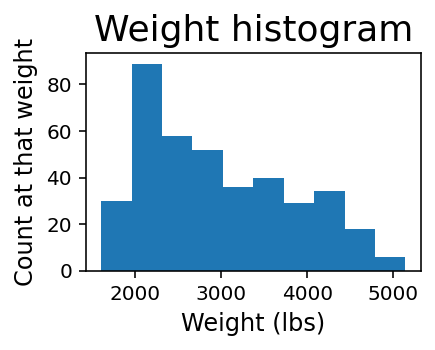

In [41]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)",         fontsize=12)
ax.set_ylabel("Count at that weight", fontsize=12)
ax.set_title("Weight histogram",      fontsize=18)
plt.show()

### Font

It's a good idea to use the same font  throughout your graph.  Here's how to change the font. Notice that the same font size in different fonts can be physically different size on the screen.

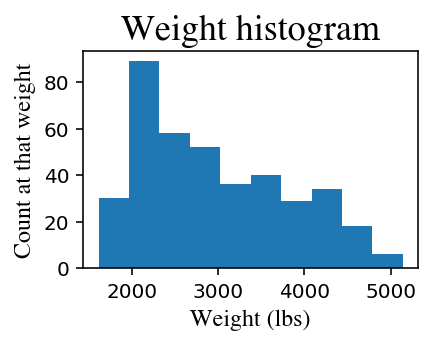

In [42]:
fig, ax = plt.subplots(figsize=(3,2)) 
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)",         fontsize=12, fontname="Times")
ax.set_ylabel("Count at that weight", fontsize=12, fontname="Times")
ax.set_title("Weight histogram",      fontsize=18, fontname="Times")
plt.show()

You can also change the font size of the axis ticks. (Switching back to `Arial` font too)

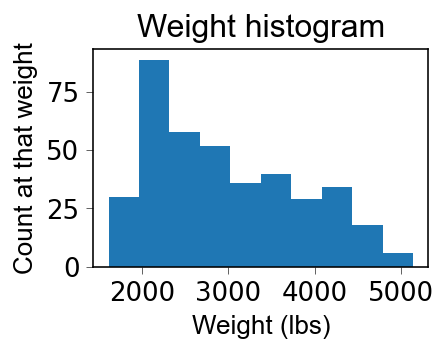

In [43]:
fig, ax = plt.subplots(figsize=(3,2))
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)",         fontsize=13, fontname="Arial")
ax.set_ylabel("Count at that weight", fontsize=13, fontname="Arial")
ax.set_title("Weight histogram",      fontsize=16, fontname="Arial")

ax.tick_params(axis='both', which='major', width=.3, labelsize=13)

plt.show()

Note that the 200, 3000 etc... are bigger.

## Color

This is a huge topic, but we need to figure out how to set the color of various  graph items and then you can think about the design issues (i.e., which and how many colors to use).

Google "color picker" and you will see a million different websites that will help you pick RGB color values (6-digit hexadecimal numbers).

Before getting started, however, it's worth pointing out that a nontrivial chunk of the world population has some form of colorblindness, with I think red-green being the most common. You can find palettes suitable for most colorblind individuals using [colorbrewer2](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3).  After drawing a diagram, you can also check what it looks like to colorblind individuals by uploading that image to [vischeck](http://www.vischeck.com/vischeck/vischeckImage.php).

### Line color and label color

Let's start out by setting the color of a line plot. The default color is not bad, but let's choose a specific color, rather than letting the library choose the colors for us. In order to get more data to plot a second curve on the same scale, let's draw `avg_mpg` and `avg_wgt/100` using some of the standard colors:

*Confusion point*: I think sometimes maplotlib uses `c` and sometimes `color` (or both?) as the name of the argument to set the color.

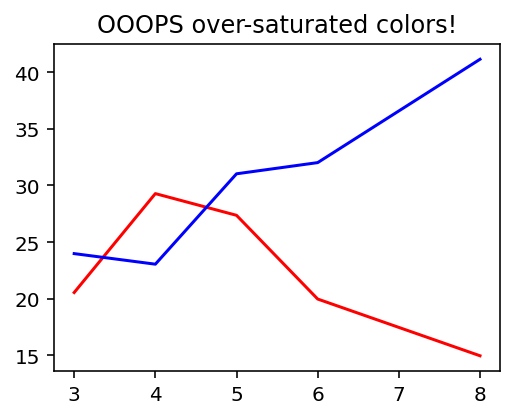

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(cyl, avg_mpg,     c='red')
ax.plot(cyl, avg_wgt/100, c='blue')
ax.set_title("OOOPS over-saturated colors!")
plt.show()

Instead, let's choose some subtler colors.  I'm going to pick them using a drawing application (OmniGraffle) and then grab the six digit code for the colors:

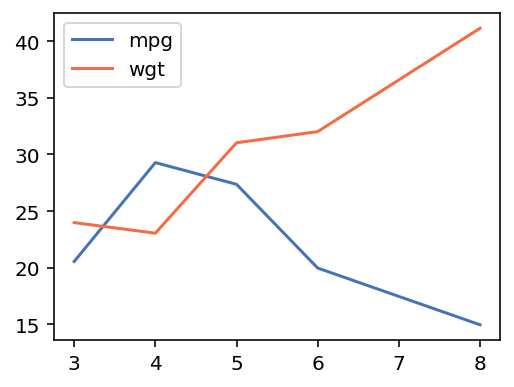

In [8]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     c='#4574B4', label="mpg") # Those are 6-digit hexadecimal numbers for red-green-blue
ax.plot(cyl, avg_wgt/100, c='#F46C43', label="wgt")

plt.legend()
plt.show()

Notice that there is good contrast between the two colors and, at least to my eye, they are more pleasing and sophisticated looking.

To make a single line stand out, we can use both color and line thickness. E.g., you can  give the highlighted line a color but make the others black or gray:

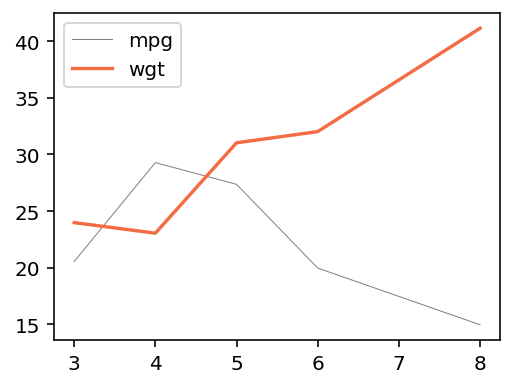

In [9]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     c='grey',    lw=.5,  label="mpg") # set skinny line width too
ax.plot(cyl, avg_wgt/100, c='#F46C43', lw=1.7, label="wgt") # fatter line

plt.legend()
plt.show()

###  Exercise 1

1. Given the following data, plot two curves and choose different colors for each
```
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)
```
1. Label the X axis as "X" and Y axis as "Amplitude"

It should look something like:
 
<img src="images/sin.png" width="200">

### Axis tick color

If it ever comes up, here's how you change the color of the tick labels themselves, though I'm not convinced it looks good.

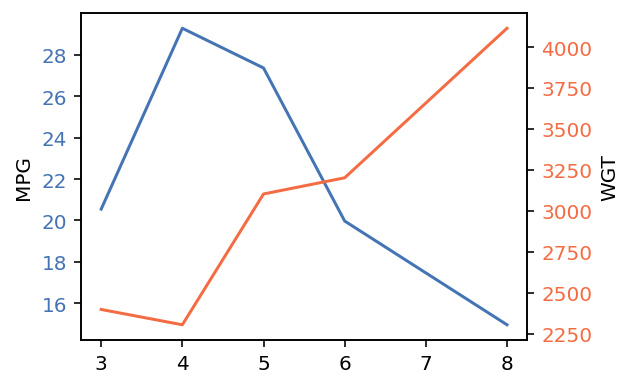

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
ax_wgt = ax.twinx()

ax.plot(cyl, avg_mpg,     c='#4574B4', label="mpg")
ax_wgt.plot(cyl, avg_wgt, c='#F46C43', label="wgt")

ax.set_ylabel("MPG")
ax_wgt.set_ylabel("WGT")

for tick in ax.get_yticklabels():
    tick.set_color('#4574B4')
for tick in ax_wgt.get_yticklabels():
    tick.set_color('#F46C43')

plt.show()

### Scatterplot colors, dot size, transparency

There's lots we can change with scatterplots, including the dot size, color, and alpha channel (transparency).   Here's how to alter the attributes of the dots:

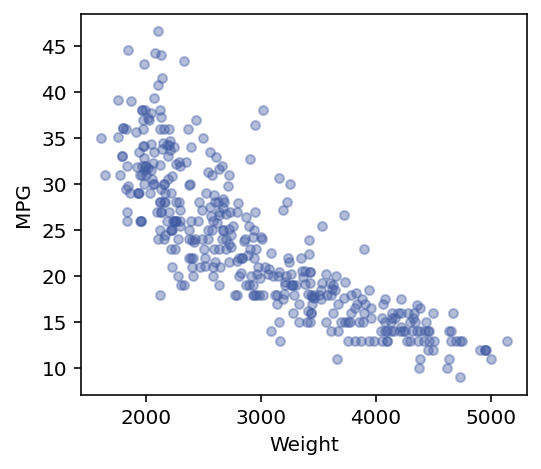

In [11]:
fig, ax = plt.subplots(figsize=(4,3.5))
ax.scatter(df_cars['WGT'], df_cars['MPG'], c='#415BA3', s=20, alpha=.4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

Notice that dots are actually circular regions edged with a slightly darker color.

Another cool thing we can do is set each dot to be a different color, based upon its Y value. The way we do this is to use a colormap.  Color maps map values in 0..1 to colors along a spectrum identified by the colormap.  That means we need to convert values in the range of our data to 0..1, and the library provides a normalization function for this. Here is how we convert the MPG column to colors:

In [32]:
# map higher values of mpg to redder colors
cmap = plt.get_cmap('coolwarm')
norm = colors.Normalize(df_cars['MPG'].min(), df_cars['MPG'].max()) 
normed = norm(df_cars['MPG'])
ycolors = cmap(normed)
ycolors[0:5] # show red-green-blue-alpha values for first five

array([[0.53800422, 0.67490159, 0.99172189, 1.        ],
       [0.42519897, 0.55905818, 0.94606146, 1.        ],
       [0.53800422, 0.67490159, 0.99172189, 1.        ],
       [0.4623544 , 0.59983011, 0.96585719, 1.        ],
       [0.50003056, 0.63850847, 0.98107012, 1.        ]])

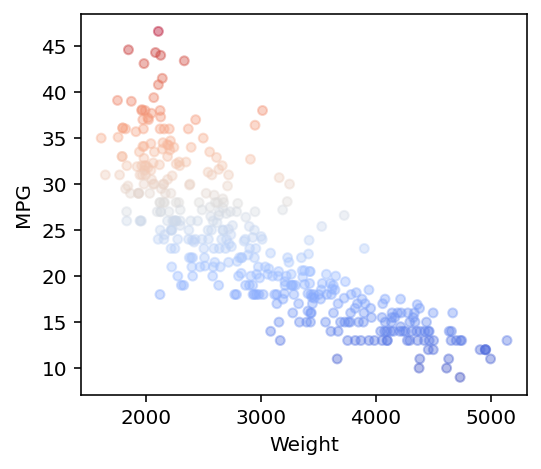

In [33]:
fig, ax = plt.subplots(figsize=(4,3.5))
# Get a value between 0 and 1 for each Y value as a color along a spectrum
crange = np.linspace(0,1,num=len(df_cars))

ax.scatter(df_cars['WGT'], df_cars['MPG'], c=ycolors, s=20, alpha=.4)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

As you can see, the higher the MPG, the redder the color.

There are lots of [color maps](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) to choose from:

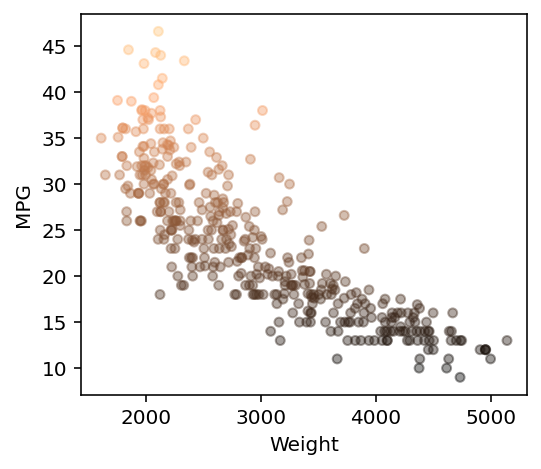

In [14]:
fig, ax = plt.subplots(figsize=(4,3.5))

cmap = plt.get_cmap('copper')
norm = colors.Normalize(df_cars['MPG'].min(), df_cars['MPG'].max()) 
ycolors = cmap(norm(df_cars['MPG']))

ax.scatter(df_cars['WGT'], df_cars['MPG'], c=ycolors, s=20, alpha=.4)

ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

### Bubble plot

Scatter plots are great for showing the relationship between two variables, but we can also show more variables by altering the size of the dots, thereby getting a bubble plot.

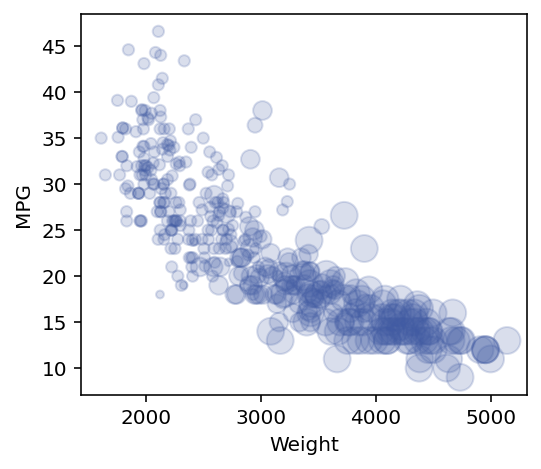

In [15]:
sizes = df_cars['CYL']**2.5  # accentuate cars with more cylinders

fig, ax = plt.subplots(figsize=(4,3.5))
ax.scatter(df_cars['WGT'], df_cars['MPG'], c='#415BA3', s=sizes, alpha=.2)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

We can also set the color to  express yet another variable, engine power. In this case, the larger the engine power the redder whereas before we showed higher MPG as redder.

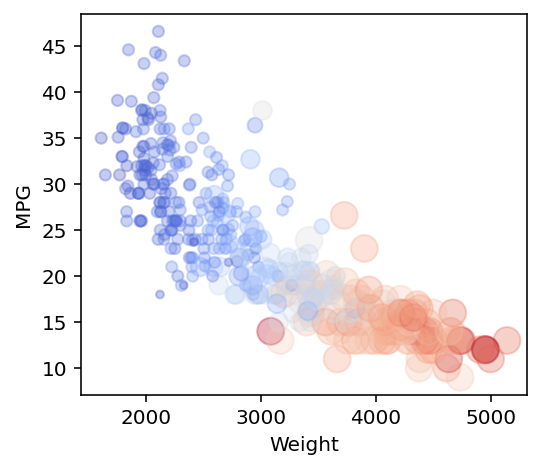

In [16]:
fig, ax = plt.subplots(figsize=(4,3.5))

sizes = df_cars['CYL']**2.5  # accentuate cars with more cylinders

# Map engine size to the colormap
cmap = plt.get_cmap('coolwarm')
norm = colors.Normalize(df_cars['ENG'].min(), df_cars['ENG'].max()) 
dotcolors = cmap(norm(df_cars['ENG']))

ax.scatter(df_cars['WGT'], df_cars['MPG'], c=dotcolors, s=sizes, alpha=.3)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")
plt.show()

### Exercise 2

1. Draw another scatterplot but this time showing `df_cars['ENG']` vs `df_cars['MPG']` and set the dot size to be related to `df_cars['CYL']` again.
1. Set the color to indicate `df_cars['WGT']`.
1. Try using different `cmap` [colormap parameters](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

### Histogram color and outlining

Personally I like lighter, less pure colors and I also like to separate the bars of the histogram with a very thin hairline around the rectangles. Let's start by looking at a histogram that does not have the hairlines around the bars. 

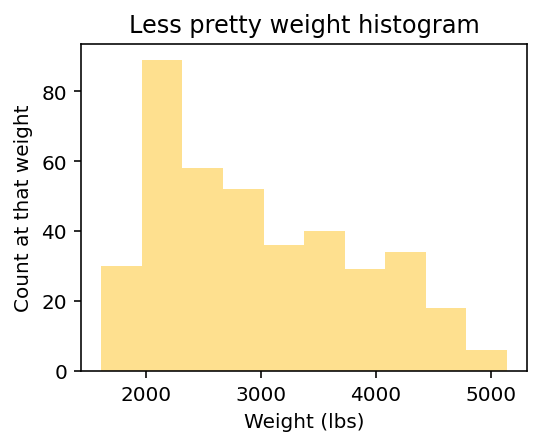

In [36]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(df_cars['WGT'], color='#FEE08F')  # save the results of hist
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Less pretty weight histogram")

plt.show()

In my opinion, the bars run together too much so let's outline them. To do that, we have to extract the return values (n, bins, patches) of `ax.hist()`. Then we walk the so-called *patches* associated with the histogram rectangles and set the attributes:

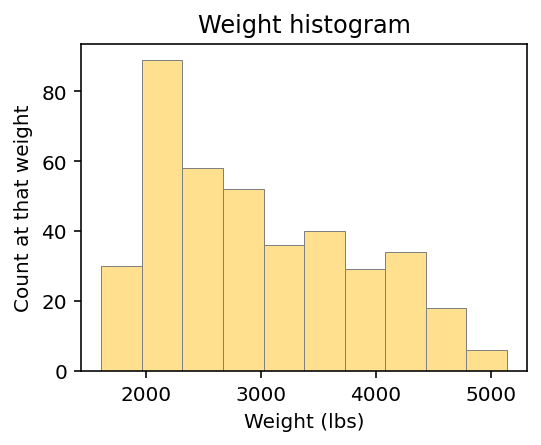

In [17]:
fig, ax = plt.subplots(figsize=(4,3))
n, bins, patches = ax.hist(df_cars['WGT'], color='#FEE08F')  # save the results of hist
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")

# iterate through the rectangles associated with each bar
for rect in patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

It's a good idea to encapsulate useful functionality as a function that we can use later. (I'm also incorporating a trick in there to remove the top and right edges of the box, which we'll see below.)

In [18]:
def histo(ax, X, color='#FEE08F'):
    n, bins, bpatches = ax.hist(X, color=color)
    ax.set_xlabel("Weight")
    ax.set_ylabel("Count")

    # make it look good
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_linewidth(.5)
    for rect in bpatches:
        rect.set_linewidth(.5)
        rect.set_edgecolor('grey')
    return n, bins, bpatches

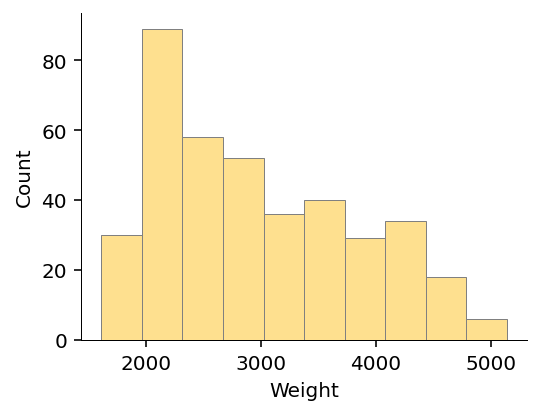

In [19]:
fig, ax = plt.subplots(figsize=(4,3))
histo(ax, df_cars['WGT'])
plt.show()

If you need to make one of the rectangles stick out, you can select the appropriate bar  and set its color:

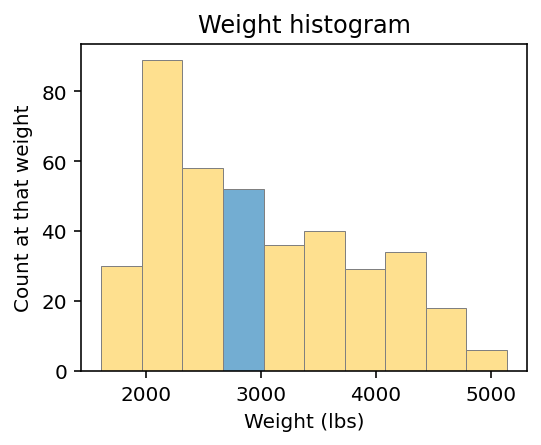

In [35]:
fig, ax = plt.subplots(figsize=(4,3))
n, bins, patches = ax.hist(df_cars['WGT'], color='#FEE08F')  # save the results of hist
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")

# iterate through the rectangles associated with each bar
for i,rect in enumerate(patches):
    if i==3: # let's say that we really care about position 3
        rect.set_color('#73ADD2')
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

plt.show()

## Line symbols, styles, markers

The third argument of the `plot()` function call is a string that represents color and style for the line and data points.  For example, `'.-'` says to place a dot at the data values and draw a line between them whereas `':'` says to just draw a dotted line:

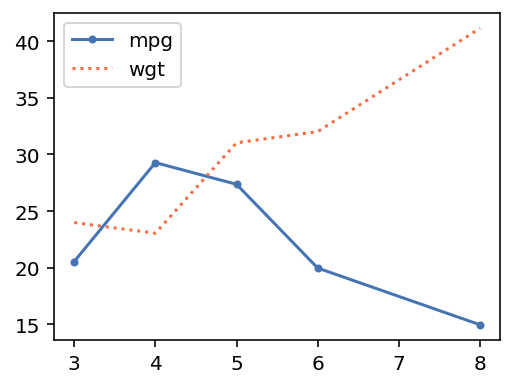

In [37]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     '.-', c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, ':',  c='#F46C43', label="wgt")

plt.legend() # uses the label arguments above
plt.show()

There are [lots of markers](https://matplotlib.org/3.1.1/api/markers_api.html) to choose from, but you should be careful not to randomly stick in markers because they look cool. Here's an example with two different marker symbols and sizes:

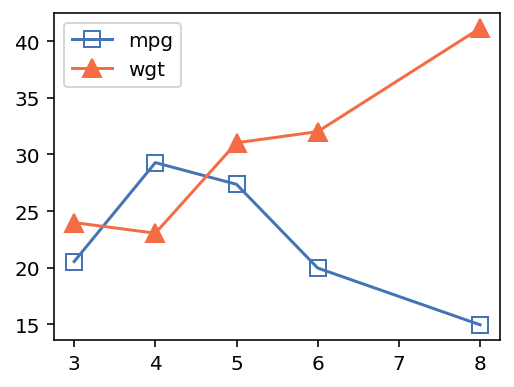

In [40]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     's-', markersize=8, fillstyle='none', c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, '^-', markersize=9,                   c='#F46C43', label="wgt")

plt.legend()
plt.show()

## Line width

Given how sharp our screens are these days, I prefer thinner lines than the default (1.0?) thickness.

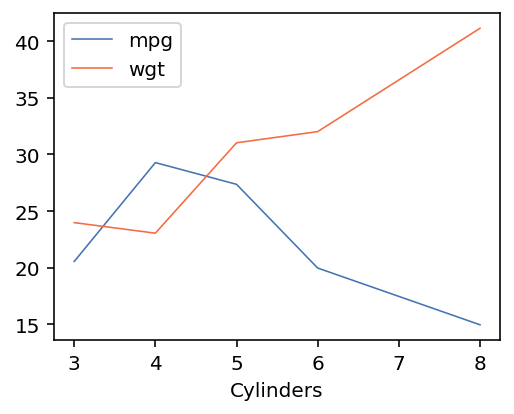

In [23]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     lw=.8, c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, lw=.8, c='#F46C43', label="wgt")

ax.set_xlabel("Cylinders")
plt.legend()
plt.show()

### Exercise 3

1. Using the sin/cos data from above (x, y1, y2), change the line style to dotted line and add markers.
1. Change the line width so one is  thick and the other is thin.

## Removing extraneous lines

Oddly enough, one of the most important things is often to reduce clutter in your graph. For example, we absolutely do not need the upper and right box lines, so let's turn them off. Let's also make the axis lines very sharp hairlines too.

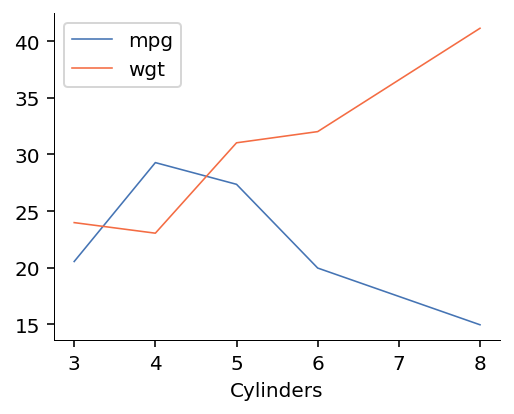

In [38]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     lw=.8, c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, lw=.8, c='#F46C43', label="wgt")

ax.spines['top'].set_visible(False)    # turns off the top "spine" completely
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.set_xlabel("Cylinders")
plt.legend()
plt.show()

If you want to get really fancy, you can actually play with the axes display as well. Here, I'm manually setting labels and ticks so they look kind of cool whereby the  axes don't actually touch.

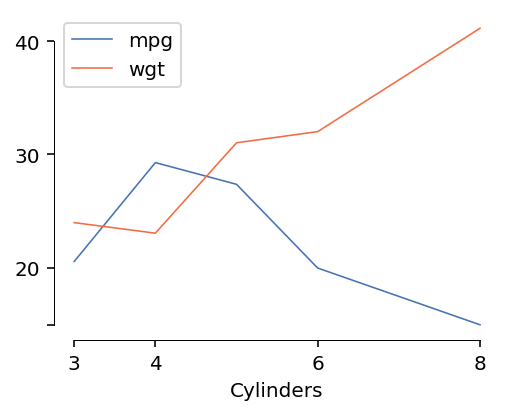

In [39]:
fig, ax = plt.subplots(figsize=(4,3))  # make one subplot (ax) on the figure

ax.plot(cyl, avg_mpg,     lw=.8, c='#4574B4', label="mpg")
ax.plot(cyl, avg_wgt/100, lw=.8,  c='#F46C43', label="wgt")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

# show from just 3 to 8
ax.spines['bottom'].set_bounds(3, 8)
# show from just min mpg to 40
ax.spines['left'].set_bounds(min(avg_mpg), 40)

ax.set_xticks([3,4,6,8])
ax.set_yticks([min(avg_mpg),20,30,40])
ax.set_yticklabels([None,20,30,40])

ax.set_xlabel("Cylinders")
plt.legend()
plt.show()

(One could argue that this graph is misleading because we are not showing the zero Y location.)

##  Categorical X axis labels

When we have a categorical variable, even an ordinal, it makes sense sometimes to change the label on the ticks of the X axis. This way, we get the category name instead of a number. In our case, we can invent a categorical name `Cyl-n`. We need to make the graph a little wider so that the labels don't overlap:

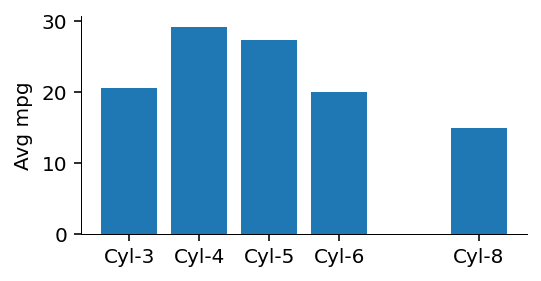

In [26]:
fig, ax = plt.subplots(figsize=(4,2))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

ax.set_xticks(cyl)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cyl-{n}' for n in cyl])
plt.show()

Sometimes the labels are so long that you need to rotate them:

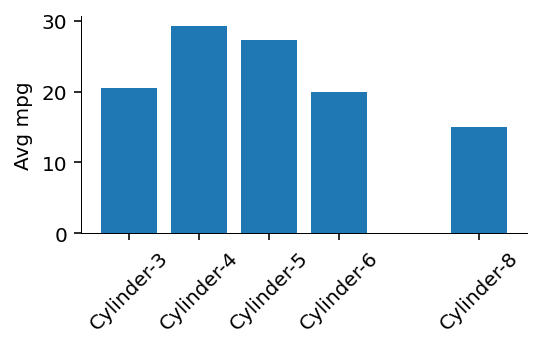

In [27]:
fig, ax = plt.subplots(figsize=(4,2))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

ax.set_xticks(cyl)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl], rotation=45)
plt.show()

Drawing the text at an angle makes it harder to read but the only other choice would be to make the plot much wider, which might be even less optimal; depends on the situation.

## Getting bar chart widths to look right

Let's say we want to show just two bars of cylinder vs mpg:

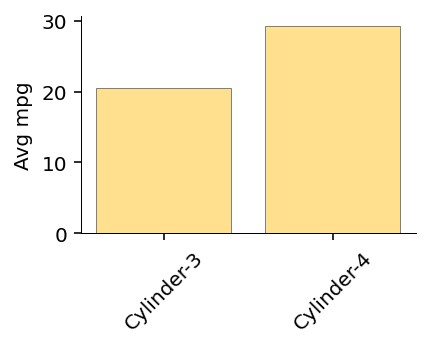

In [28]:
cyl_ = cyl[0:2]
avg_mpg_ = avg_mpg[0:2]

fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
barcontainers = ax.bar(cyl_, avg_mpg_, color='#FEE08F')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl_)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl_], rotation=45)
plt.show()

But we also want thin bars. We can either change the figsize which then changes the visible bar width:

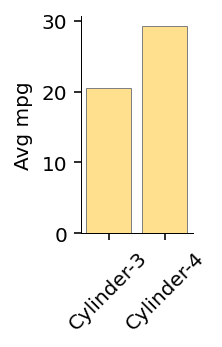

In [29]:
fig, ax = plt.subplots(figsize=(1,2))  # make one subplot (ax) on the figure
barcontainers = ax.bar(cyl_, avg_mpg_, color='#FEE08F')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl_)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl_], rotation=45)
plt.show()

OR we can the set the bar width but it's a ratio not a fixed width. Look what happens with a wider plot:

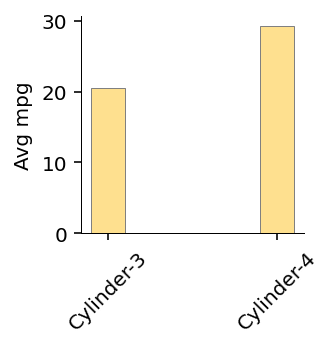

In [30]:
fig, ax = plt.subplots(figsize=(2,2))  # make one subplot (ax) on the figure
barcontainers = ax.bar(cyl_, avg_mpg_, color='#FEE08F', width=.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl_)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl_], rotation=45)
plt.show()

You have to play with the figure size and the bar width to get the bar chart you want. If you have the right bar width, but you want to make it bigger, you can increase the figure size, but **keep the aspect ratio the same**. The previous figure with nice-looking bar widths had size of (1,2); we can make that figure twice as big by doubling both components of the figure size:

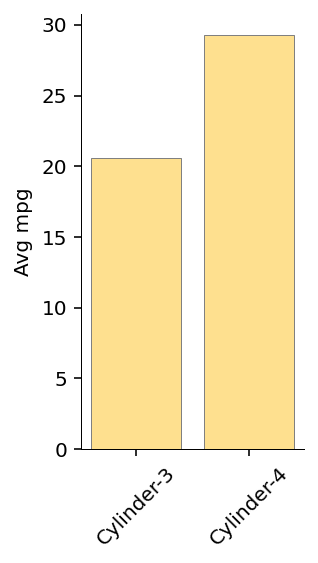

In [31]:
fig, ax = plt.subplots(figsize=(2,4))  # make one subplot (ax) on the figure
barcontainers = ax.bar(cyl_, avg_mpg_, color='#FEE08F')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Avg mpg")

for rect in barcontainers.patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl_)                     # make sure we have a ticket for every cyl value
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl_], rotation=45)
plt.show()

### Exercise 4

1. Draw a bar chart displaying `avg_wgt`, which is the average weight for each number of cylinders. It could look like this:<br>
<img src="images/cyl_wgt.png" width="200">
1. Make sure to remove the top and right graph spines (box edges)
1. Set a cool color and make sure to draw a nice edge around each bar if the color is light

## Multiple bars per X in bar chart

Getting multiple bars per X value is trickier. We need to manually adjust the X position (boo!).  For 7 days of week, we can use 0..6 as the X values but it's still a continuous space. We can shift a bar by adding or subtracking a bit from the X coordinate. We call `bar()` three times, once per low/med/high level, shifting the X-coordinate a little bit so that they are offset. Otherwise the bars would appear right on top of each other because all of the X-coordinate's, `np.arange(7)`, are the same.

Here's some data for 3 variables over days of the week:

In [50]:
high = np.array([ 337, 628,   722,  636,  649,  510,  351])
med  = np.array([ 969, 1950, 2077, 1886, 1905, 1479,  942])
low  = np.array([2866, 5643, 6425, 5521, 4897, 4845, 3179])

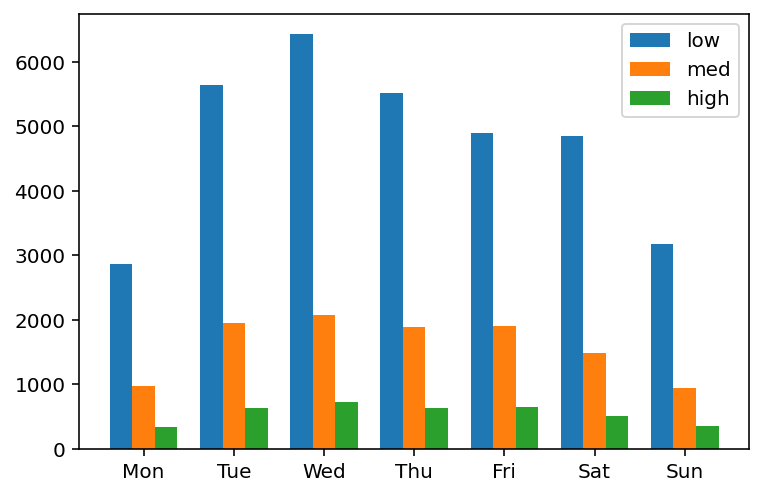

In [57]:
fig, ax = plt.subplots()
w = .25 # Use 25% of each slot (day of week) per bar, leaving 25% for spacing
ax.bar(np.arange(7)-w, low,  width=w, label="low")
ax.bar(np.arange(7),   med,  width=w, label="med")
ax.bar(np.arange(7)+w, high, width=w, label="high")
ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend() # use labels from bar() calls
plt.show()